In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
import warnings
from time import time
from sklearn.ensemble import StackingClassifier
from mlxtend.plotting import plot_confusion_matrix

In [2]:
pd.options.display.max_columns = 30
warnings.filterwarnings('ignore')

In [3]:
bank_df = pd.read_csv('fin_data.csv')
bank_df

,age,sex,marital_status,education_level,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,degree,default_payment_next_month
0,24,2,1,2,20000,2,2,-1,-1,-2,-2,0,689,0,0,0,0,3913,3102,689,0,0,0,university,1
1,26,2,2,2,120000,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,2682,1725,2682,3272,3455,3261,university,1
2,34,2,2,2,90000,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,29239,14027,13559,14331,14948,15549,university,0
3,37,2,1,2,50000,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,46990,48233,49291,28314,28959,29547,university,0
4,57,1,1,2,50000,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,8617,5670,35835,20940,19146,19131,university,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,39,1,1,3,220000,0,0,0,0,0,0,8500,20000,5003,3047,5000,1000,188948,192815,208365,88004,31237,15980,high school,0
29996,43,1,2,3,150000,-1,-1,-1,-1,0,0,1837,3526,8998,129,0,0,1683,1828,3502,8979,5190,0,high school,0
29997,37,1,2,2,30000,4,3,2,-1,0,0,0,0,22000,4200,2000,3100,3565,3356,2758,20878,20582,19357,university,1
29998,41,1,1,3,80000,1,-1,0,0,0,-1,85900,3409,1178,1926,52964,1804,-1645,78379,76304,52774,11855,48944,high school,1


In [4]:
bank_df.isnull().sum()

age                            0
sex                            0
marital_status                 0
education_level                0
limit_balance                  0
pay_0                          0
pay_2                          0
pay_3                          0
pay_4                          0
pay_5                          0
pay_6                          0
pay_amt_1                      0
pay_amt_2                      0
pay_amt_3                      0
pay_amt_4                      0
pay_amt_5                      0
pay_amt_6                      0
bill_amt_1                     0
bill_amt_2                     0
bill_amt_3                     0
bill_amt_4                     0
bill_amt_5                     0
bill_amt_6                     0
degree                        14
default_payment_next_month     0
dtype: int64

In [5]:
bank_df['education_level'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education_level, dtype: int64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


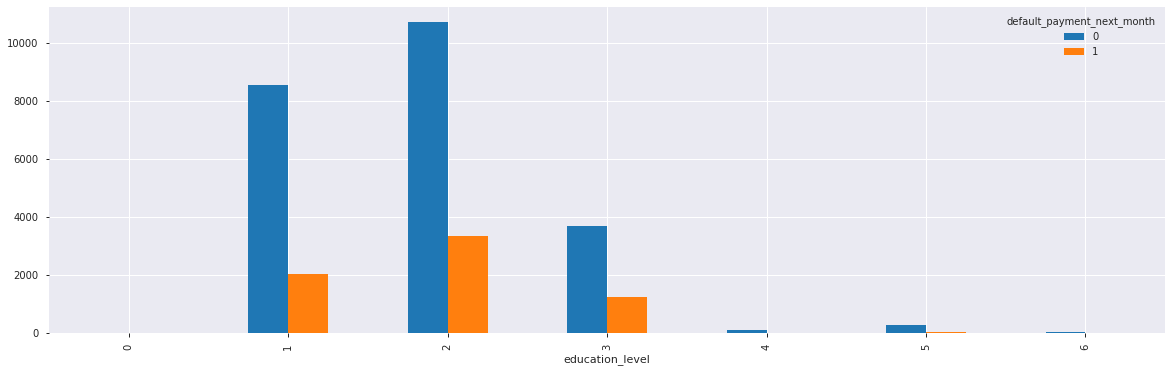

In [6]:
pd.crosstab(bank_df.education_level,bank_df.default_payment_next_month).plot(kind="bar",figsize=(20,6));
plt.show()

In [7]:
bank_df.groupby(['education_level','degree'] ).size()

education_level  degree         
1                graduate school    10585
2                university         14030
3                high school         4917
4                others               123
5                unknown              280
6                unknown               51
dtype: int64

In [8]:
bank_df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

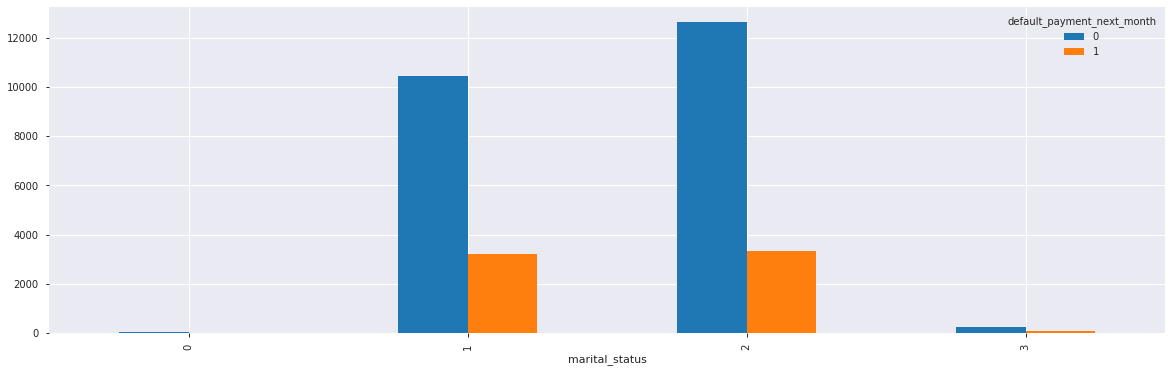

In [9]:
pd.crosstab(bank_df.marital_status,bank_df.default_payment_next_month).plot(kind="bar",figsize=(20,6));
plt.show()

In [10]:
# data cleaning and preprocessing
bank_df.drop_duplicates(inplace=True)
bank_df.dropna(inplace=True)
bank_df.drop('degree', axis=1, inplace=True)
bank_df = bank_df[bank_df['marital_status'] > 0]
bank_df['education_level'] = bank_df['education_level'].apply(lambda x: 0 if x>3 else x)
bank_df.reset_index(drop=True, inplace=True)
bank_df

,age,sex,marital_status,education_level,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,default_payment_next_month
0,24,2,1,2,20000,2,2,-1,-1,-2,-2,0,689,0,0,0,0,3913,3102,689,0,0,0,1
1,26,2,2,2,120000,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,2682,1725,2682,3272,3455,3261,1
2,34,2,2,2,90000,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,29239,14027,13559,14331,14948,15549,0
3,37,2,1,2,50000,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,46990,48233,49291,28314,28959,29547,0
4,57,1,1,2,50000,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,8617,5670,35835,20940,19146,19131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29892,39,1,1,3,220000,0,0,0,0,0,0,8500,20000,5003,3047,5000,1000,188948,192815,208365,88004,31237,15980,0
29893,43,1,2,3,150000,-1,-1,-1,-1,0,0,1837,3526,8998,129,0,0,1683,1828,3502,8979,5190,0,0
29894,37,1,2,2,30000,4,3,2,-1,0,0,0,0,22000,4200,2000,3100,3565,3356,2758,20878,20582,19357,1
29895,41,1,1,3,80000,1,-1,0,0,0,-1,85900,3409,1178,1926,52964,1804,-1645,78379,76304,52774,11855,48944,1


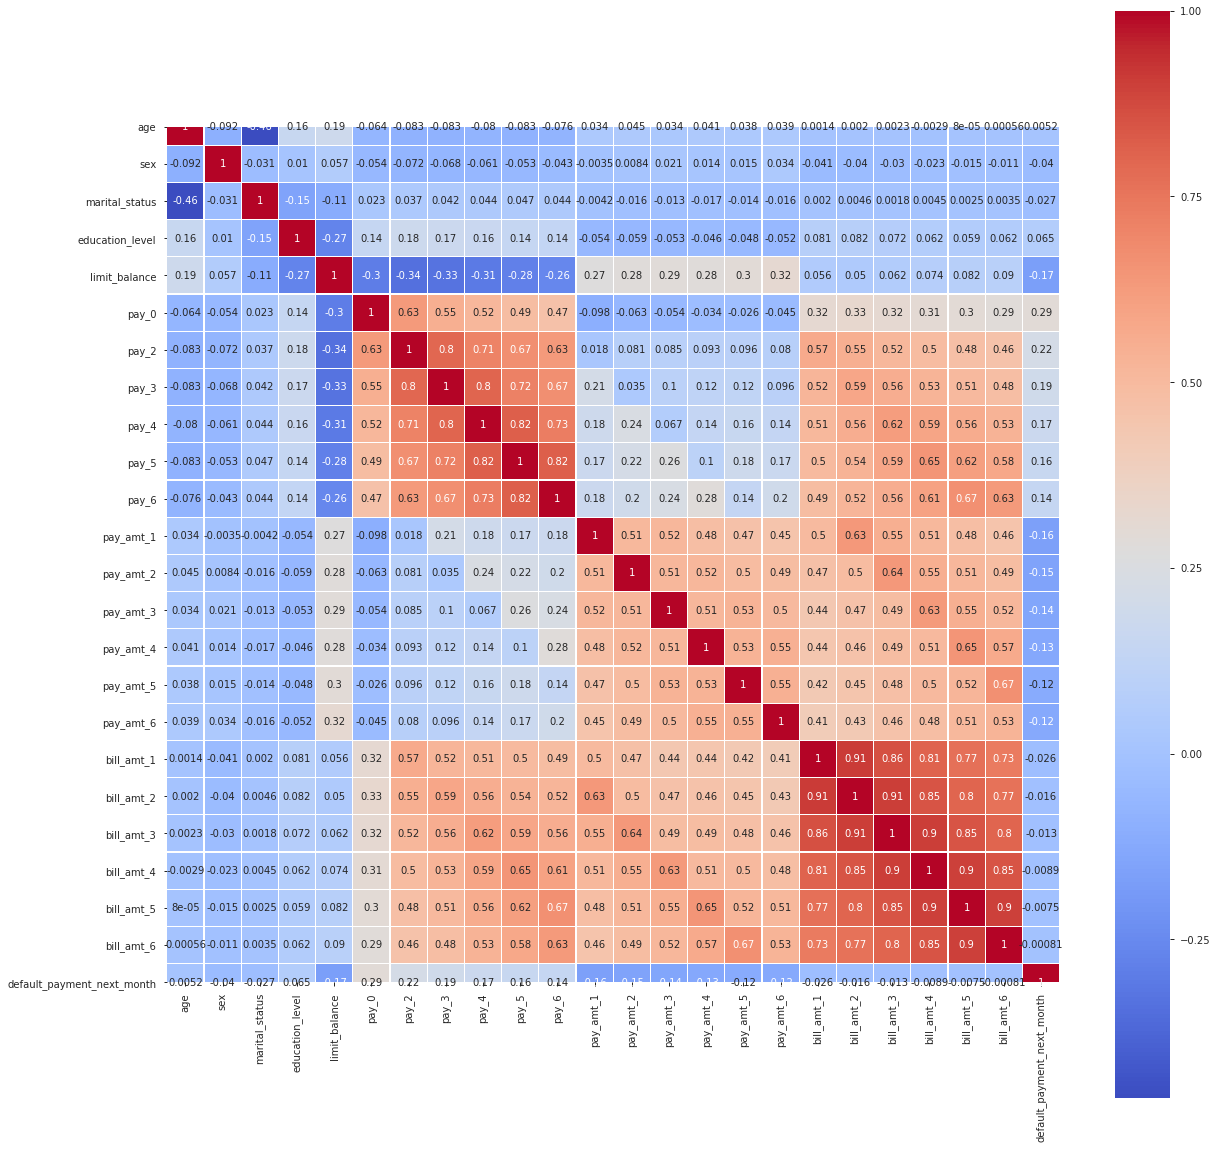

In [11]:
# Correlation table
plt.figure(figsize=(20,20))
sns.heatmap(bank_df.astype(float).corr(method= 'spearman'),linewidths=0.1,vmax=1.0, square=True, cmap="coolwarm", linecolor='white', annot=True)

In [12]:
# MinMaxScaler and train test split
X = bank_df.drop('default_payment_next_month' , axis=1)
y = bank_df['default_payment_next_month']
scaler = MinMaxScaler()
X_scalled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=42)

In [19]:
# Models
accuracy_list = []
roc_auc_list = []
f1_score_list = []
recall_list = []
time_list = []

models = [RandomForestClassifier(random_state=42),
          AdaBoostClassifier(random_state=42),
          LogisticRegression(random_state=42), 
          SVC(random_state=42),
          XGBClassifier(random_state=42),
          KNeighborsClassifier()
         ]
for model in models:
    start = time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_f1 = f1_score(y_test, y_pred)
    f1_score_list.append(score_f1)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    roc_auc = roc_auc_score(y_test, y_pred)
    roc_auc_list.append(roc_auc)
    recall = recall_score(y_test, y_pred)
    recall_list.append(recall)
    end = time()
    time_list.append(end-start)

    print("Accuracy score: %.2f%%" % (accuracy*100),  "ROC AUC score: %.2f%%" % (roc_auc*100), 
          "F1 score: %.2f%%" % (score_f1*100), "Recall: %.2f%%" % (recall*100))


Accuracy score: 81.47% ROC AUC score: 64.48% F1 score: 44.71% Recall: 34.33%
Accuracy score: 81.59% ROC AUC score: 63.31% F1 score: 42.27% Recall: 30.88%
Accuracy score: 81.30% ROC AUC score: 60.62% F1 score: 35.82% Recall: 23.91%
Accuracy score: 81.72% ROC AUC score: 63.34% F1 score: 42.32% Recall: 30.73%
Accuracy score: 81.84% ROC AUC score: 64.58% F1 score: 44.93% Recall: 33.95%
Accuracy score: 79.85% ROC AUC score: 62.92% F1 score: 41.59% Recall: 32.87%


In [20]:
Param = ['RandomForest', 'AdaBoost', 'LogRegression', 'SVC', 'XGBClassifier', 'KNN']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


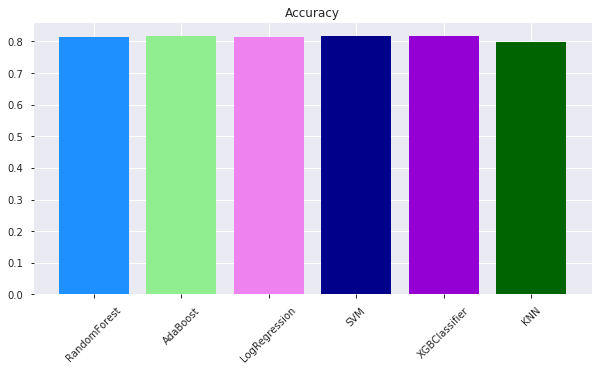

In [21]:
# Accuracy
plt.figure(figsize=[10,5])
s = accuracy_list
x = range(len(s))
ax = plt.gca()
color_rectangle = ["dodgerblue", "lightgreen", "violet", "darkblue", "darkviolet", "darkgreen"]
ax.bar(x, s, color=color_rectangle) 
ax.set_xticks(x)
ax.set_xticklabels(('RandomForest', 'AdaBoost', 'LogRegression', 'SVM', 'XGBClassifier', 'KNN'))
plt.xticks(rotation=45)
plt.title('Accuracy')
plt.show()

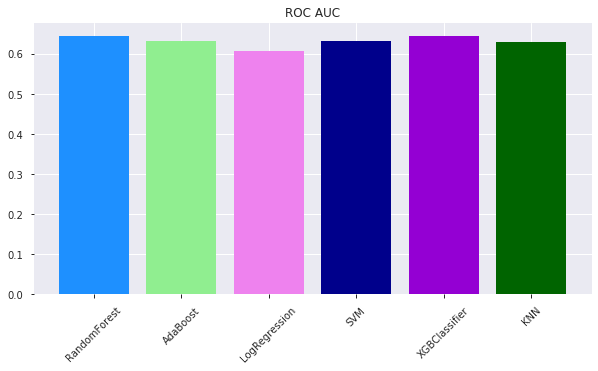

In [22]:
# ROC AUC
plt.figure(figsize=[10,5])
s = roc_auc_list
x = range(len(s))
ax = plt.gca()
color_rectangle = ["dodgerblue", "lightgreen", "violet", "darkblue", "darkviolet", "darkgreen"]
ax.bar(x, s, color=color_rectangle) 
ax.set_xticks(x)
ax.set_xticklabels(('RandomForest', 'AdaBoost', 'LogRegression', 'SVM', 'XGBClassifier', 'KNN'))
plt.xticks(rotation=45)
plt.title('ROC AUC')
plt.show()

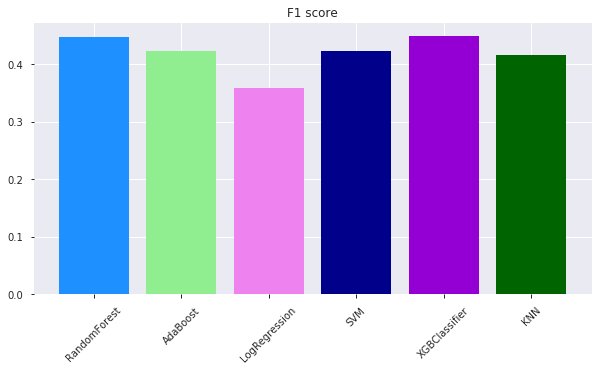

In [23]:
# F1 score
plt.figure(figsize=[10,5])
s = f1_score_list
x = range(len(s))
ax = plt.gca()
color_rectangle = ["dodgerblue", "lightgreen", "violet", "darkblue", "darkviolet", "darkgreen"]
ax.bar(x, s, color=color_rectangle)
ax.set_xticks(x)
ax.set_xticklabels(('RandomForest', 'AdaBoost', 'LogRegression', 'SVM', 'XGBClassifier', 'KNN'))
plt.xticks(rotation=45)
plt.title('F1 score')
plt.show()

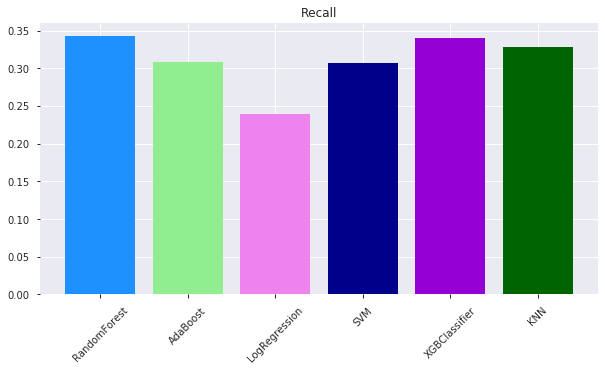

In [24]:
# Recall
plt.figure(figsize=[10,5])
s = recall_list
x = range(len(s))
ax = plt.gca()
color_rectangle = ["dodgerblue", "lightgreen", "violet", "darkblue", "darkviolet", "darkgreen"]
ax.bar(x, s, color=color_rectangle) 
ax.set_xticks(x)
ax.set_xticklabels(('RandomForest', 'AdaBoost', 'LogRegression', 'SVM', 'XGBClassifier', 'KNN'))
plt.xticks(rotation=45)
plt.title('Recall')
plt.show()

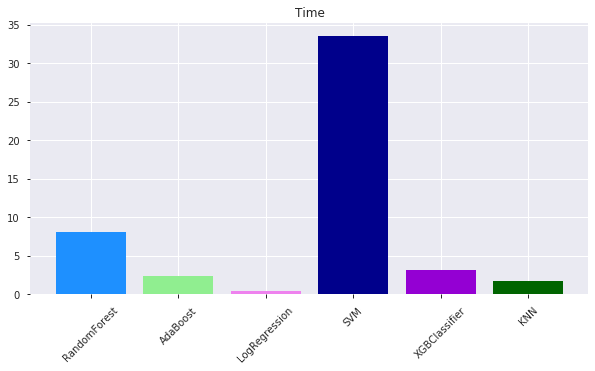

In [25]:
# Time
plt.figure(figsize=[10,5])
s = time_list
x = range(len(s))
ax = plt.gca()
color_rectangle = ["dodgerblue", "lightgreen", "violet", "darkblue", "darkviolet", "darkgreen"]
ax.bar(x, s, color=color_rectangle) 
ax.set_xticks(x)
ax.set_xticklabels(('RandomForest', 'AdaBoost', 'LogRegression', 'SVM', 'XGBClassifier', 'KNN'))
plt.xticks(rotation=45)
plt.title('Time')
plt.show()

In [29]:
# Stacking
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', LinearSVC(random_state=42)),
     ('xcb_m', LogisticRegression())]

clf = StackingClassifier(
     estimators=estimators, final_estimator=XGBClassifier())

clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)  

(0.8168896321070234,
 0.6475739135779703,
 0.3471264367816092,
 0.45277361319340326)

In [68]:
# GridSearch
alg = xgb.XGBClassifier(objective='binary:logitraw')

xgb_alg = GridSearchCV(alg,{'max_depth': [3,4],
                        'n_estimators': [50,100],
                        'scale_pos_weight' : [4,5,6],
                        'grow_policy':['lossguide'], 
                        'tree_method':['hist']},
                       scoring = 'f1_weighted' )

xgb_alg.fit(X_train, y_train)
xgb_alg.best_score_, xgb_alg.best_params_

(0.8018408662752217,
 {'grow_policy': 'lossguide',
  'max_depth': 3,
  'n_estimators': 100,
  'scale_pos_weight': 4,
  'tree_method': 'hist'})

In [73]:
# XGBClassifier
XGB_model = XGBClassifier(max_depth=3, n_estimators= 100, scale_pos_weight=4, 
                          grow_policy='lossguide', tree_method= 'hist')
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print("Accuracy score: %.2f%%" % (accuracy_score(y_test, y_pred)*100),  "ROC AUC score: %.2f%%" % (roc_auc_score(y_test, y_pred)*100), 
          "F1 score: %.2f%%" % (f1_score(y_test, y_pred)*100), "Recall: %.2f%%" % (recall_score(y_test, y_pred)*100))

Accuracy score: 74.41% ROC AUC score: 71.40% F1 score: 52.98% Recall: 66.05%


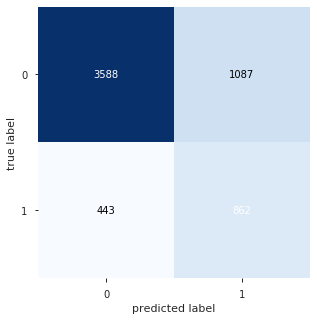

In [74]:
# confusion_matrix
CM = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))